In [342]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import scipy.stats as sc
import matplotlib.pyplot as plt

In [343]:
bank = pd.read_csv('Loan_data_1.csv')

In [344]:
bank.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [345]:
bank.tail()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,376,LP002953,Male,Yes,3+,Graduate,No,5703.0,0.0,128.0,360.0,1.0,Urban,Y
377,377,LP002974,Male,Yes,0,Graduate,No,3232.0,NaN,108.0,360.0,1.0,Rural,Y
378,378,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
379,379,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
380,380,LP002990,Female,No,0,NaN,Yes,4583.0,0.0,133.0,360.0,0.0,Semiurban,N


In [346]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         381 non-null    int64  
 1   Loan_ID            381 non-null    object 
 2   Gender             376 non-null    object 
 3   Married            381 non-null    object 
 4   Dependents         373 non-null    object 
 5   Education          375 non-null    object 
 6   Self_Employed      360 non-null    object 
 7   ApplicantIncome    369 non-null    float64
 8   CoapplicantIncome  363 non-null    float64
 9   LoanAmount         373 non-null    float64
 10  Loan_Amount_Term   370 non-null    float64
 11  Credit_History     351 non-null    float64
 12  Property_Area      381 non-null    object 
 13  Loan_Status        381 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 41.8+ KB


In [347]:
bank.shape

(381, 14)

In [348]:
bank.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,369.000000,363.000000,373.000000,370.000000,351.000000
mean,190.000000,3563.422764,1267.005289,104.914209,340.864865,0.837607
std,110.129469,1427.371257,2388.048316,28.484822,68.549257,0.369338
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,95.000000,2583.000000,0.000000,90.000000,360.000000,1.000000
50%,190.000000,3326.000000,830.000000,110.000000,360.000000,1.000000
75%,285.000000,4226.000000,2008.000000,127.000000,360.000000,1.000000
max,380.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000


# I observed that the following categorical columns have missing values : Gender,  Dependents, Education, self-employed

# I observed that the following numerical columns have missing values: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History

# Handling numerical columns using median

In [349]:
for column in bank.select_dtypes(include = ['float64' , 'int64']).columns:
    bank[column].fillna(bank[column].mean(), inplace = True)

# Handling categorical columns using mode

In [350]:
for column in bank.select_dtypes(include = 'object').columns:
    bank[column].fillna(bank[column].mode()[0], inplace = True)

In [351]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         381 non-null    int64  
 1   Loan_ID            381 non-null    object 
 2   Gender             381 non-null    object 
 3   Married            381 non-null    object 
 4   Dependents         381 non-null    object 
 5   Education          381 non-null    object 
 6   Self_Employed      381 non-null    object 
 7   ApplicantIncome    381 non-null    float64
 8   CoapplicantIncome  381 non-null    float64
 9   LoanAmount         381 non-null    float64
 10  Loan_Amount_Term   381 non-null    float64
 11  Credit_History     381 non-null    float64
 12  Property_Area      381 non-null    object 
 13  Loan_Status        381 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 41.8+ KB


# Checking for Outliers using z-score

In [352]:
for column in bank.select_dtypes(include = ['int64' , 'float64']).columns:
    z_scores = (bank[column] - bank[column].mean())/ bank[column].std()
    outliers = bank[np.abs(z_scores)>3]
    print(f"outliers in {column} : \n {outliers} \n")

outliers in Unnamed: 0 : 
 Empty DataFrame
Columns: [Unnamed: 0, Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: [] 

outliers in ApplicantIncome : 
      Unnamed: 0   Loan_ID  Gender Married Dependents Education Self_Employed  \
99           99  LP001572    Male     Yes          0  Graduate            No   
153         153  LP001814    Male     Yes          2  Graduate            No   
235         235  LP002219    Male     Yes         3+  Graduate            No   
275         275  LP002377  Female      No          1  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
99            9323.0                0.0        75.0             180.0   
153           9703.0                0.0       112.0             360.0   
235           8750.0             4996.0       130.0             360.0   
275           8624.0    

# Handling outliers using capping and flooring methods

In [353]:
for column in bank.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = bank[column].quantile(0.25)
    Q3 = bank[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    bank[column] = np.where(bank[column] > upper_bound, upper_bound, bank[column])
    bank[column] = np.where(bank[column] < lower_bound, lower_bound, bank[column])


# Checking if there are still outliers

In [354]:
for column in bank.select_dtypes(include = ['int64' , 'float64']).columns:
    z_scores = (bank[column] - bank[column].mean())/ bank[column].std()
    outliers = bank[np.abs(z_scores)>3]
    print(f"outliers in {column} : \n {outliers} \n")

outliers in Unnamed: 0 : 
 Empty DataFrame
Columns: [Unnamed: 0, Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: [] 

outliers in ApplicantIncome : 
 Empty DataFrame
Columns: [Unnamed: 0, Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: [] 

outliers in CoapplicantIncome : 
 Empty DataFrame
Columns: [Unnamed: 0, Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: [] 

outliers in LoanAmount : 
 Empty DataFrame
Columns: [Unnamed: 0, Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Stat

In [355]:
bank.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,381.000000,381.0,381.0
mean,190.000000,3518.556622,1134.291378,105.122871,360.0,1.0
std,110.129469,1270.648953,1261.749738,27.595435,0.0,0.0
min,0.000000,218.000000,0.000000,34.500000,360.0,1.0
25%,95.000000,2600.000000,0.000000,90.000000,360.0,1.0
50%,190.000000,3357.000000,1041.000000,110.000000,360.0,1.0
75%,285.000000,4188.000000,1964.000000,127.000000,360.0,1.0
max,380.000000,6570.000000,4910.000000,150.000000,360.0,1.0


# Using boxplot to visualize for outliers

<Axes: xlabel='ApplicantIncome'>

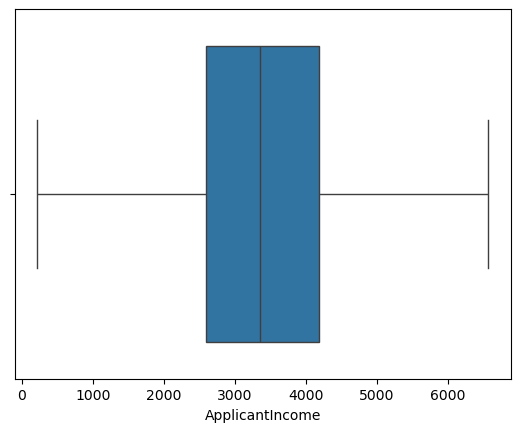

In [356]:
sns.boxplot(x = bank['ApplicantIncome'], data = bank)

In [357]:
bank.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1.0,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2.0,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3.0,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4.0,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


# Deleting unique columns

In [358]:
bank = bank.drop(columns = ['Unnamed: 0' , 'Loan_ID'])

In [359]:
bank.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


# checking for skewness

C:\Users\musa\AppData\Local\Temp\ipykernel_6012\206839098.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = bank[column], hist = True , kde = True)
C:\Users\musa\AppData\Local\Temp\ipykernel_6012\206839098.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = bank[column], hist = True , 

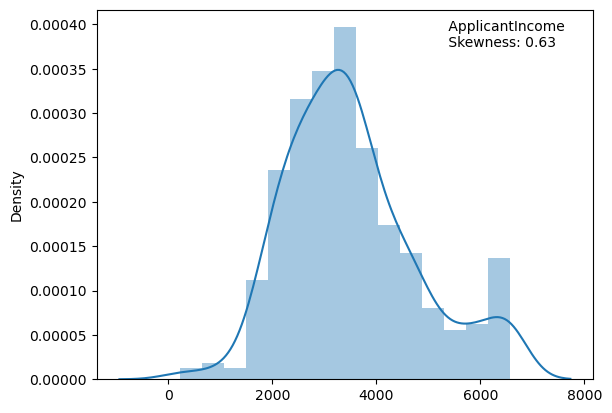

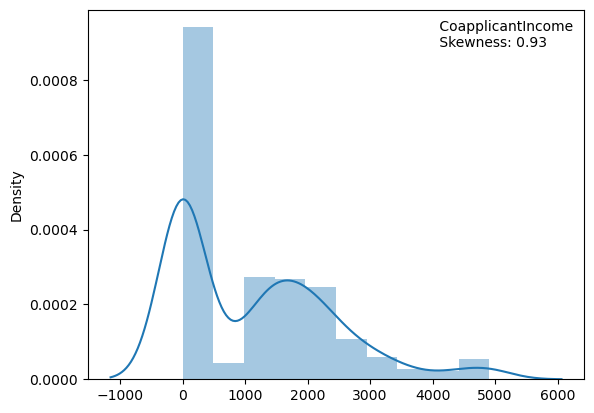

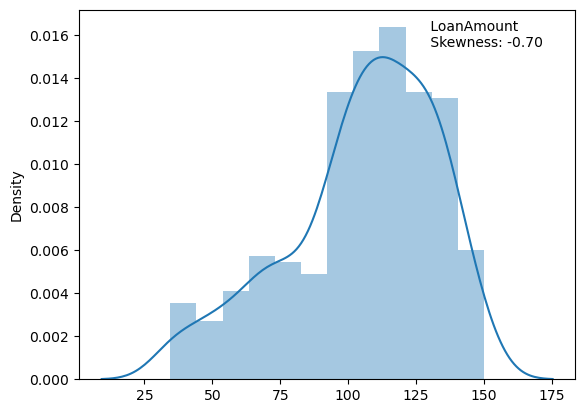

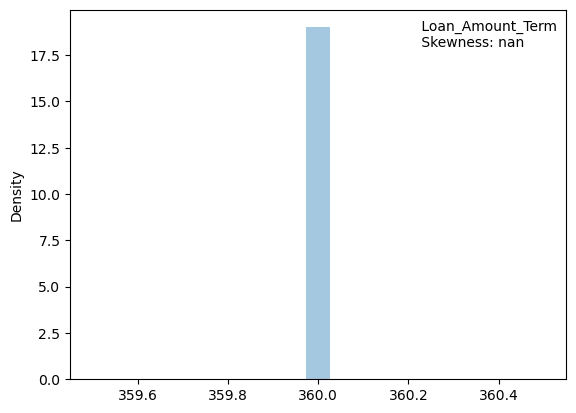

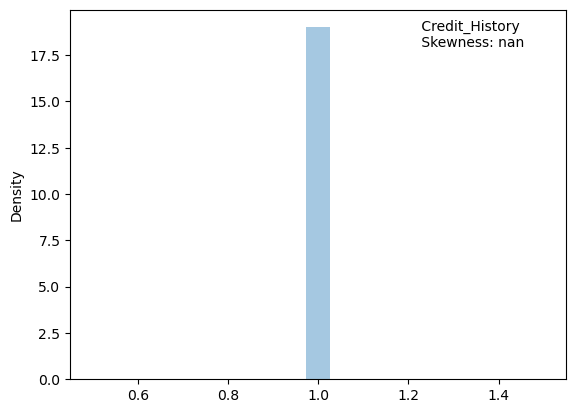

In [360]:
from scipy.stats import skew
for column in bank.select_dtypes(include = ['int64' , 'float64']).columns:
    skewness = skew(bank[column])
    plt.figure()
    sns.distplot(x = bank[column], hist = True , kde = True)
    plt.annotate(f' {column} \n Skewness: {skewness:.2f}', xy=(0.7, 0.9), xycoords='axes fraction')
    
    

# I observed that Applicantincome and coapplicantincome are skewed

# Handling skewness using boxcox method 

# Solving skewness on ApplicantIncome

In [361]:
from scipy.stats import boxcox
bank.ApplicantIncome = pd.Series(boxcox(1 + bank.ApplicantIncome)[0])

C:\Users\musa\AppData\Local\Temp\ipykernel_6012\2830716583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank.ApplicantIncome, hist = True , kde = True)


Text(0.7, 0.9, ' skewness :0.08')

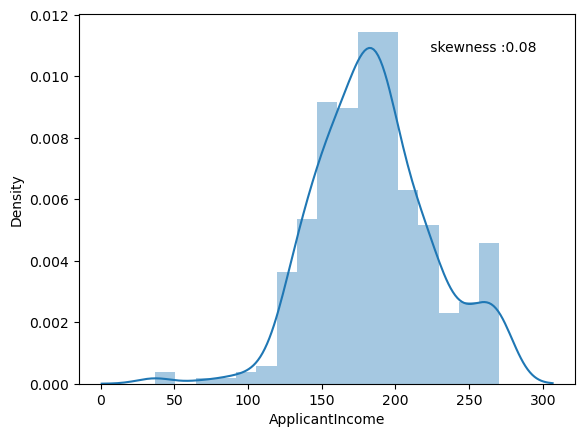

In [362]:
sns.distplot(bank.ApplicantIncome, hist = True , kde = True)
skewness = skew(bank.ApplicantIncome)
plt.annotate(f" skewness :{skewness:.2f}", xy=(0.7, 0.9), xycoords='axes fraction')

# solving skewness on CoapplicantIncome

In [363]:
bank.CoapplicantIncome = pd.Series(boxcox(1 + bank.CoapplicantIncome)[0])

C:\Users\musa\AppData\Local\Temp\ipykernel_6012\518212940.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank.CoapplicantIncome , hist = True , kde = True)


Text(0.7, 0.9, 'skewness : -0.14')

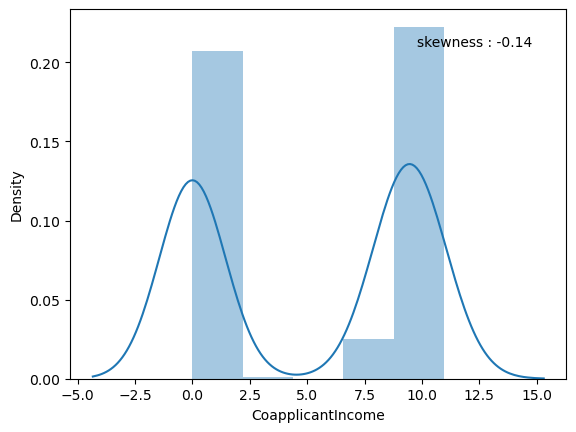

In [364]:
sns.distplot(bank.CoapplicantIncome , hist = True , kde = True)
skewness = skew(bank.CoapplicantIncome)
plt.annotate(f"skewness : {skewness:.2f}", xy= (0.7,0.9) , xycoords = 'axes fraction')

# Encoding the dataframe

In [365]:
bank.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,219.563905,9.106998,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,171.735018,0.000000,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,157.440460,9.797386,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,256.622463,0.000000,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,148.397129,9.115065,95.0,360.0,1.0,Urban,Y


# I observed that Dependents, education, property and Loan_Status has an inherent order so we use ordinal encoding

In [366]:
from sklearn.preprocessing import OrdinalEncoder

# Manually specify the order mapping
order_mapping = [['Graduate','Not Graduate' ]]

# Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(bank[['Education']])
bank['Education_Encoded'] = encoded_data

In [367]:
bank.Education.unique().tolist()

['Graduate', 'Not Graduate']

In [368]:
bank.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Education_Encoded
0,Male,Yes,1,Graduate,No,219.563905,9.106998,128.0,360.0,1.0,Rural,N,0.0
1,Male,Yes,0,Graduate,Yes,171.735018,0.000000,66.0,360.0,1.0,Urban,Y,0.0
2,Male,Yes,0,Not Graduate,No,157.440460,9.797386,120.0,360.0,1.0,Urban,Y,1.0
3,Male,No,0,Graduate,No,256.622463,0.000000,141.0,360.0,1.0,Urban,Y,0.0
4,Male,Yes,0,Not Graduate,No,148.397129,9.115065,95.0,360.0,1.0,Urban,Y,1.0


# deleting education column

In [369]:
bank = bank.drop('Education' , axis = 1)

# Encoding Property area

In [370]:

order_mapping = [['Rural','Semiurban','Urban' ]]

encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(bank[['Property_Area']])
bank['Property_encoded'] = encoded_data

In [371]:
bank.Property_Area.unique().tolist()

['Rural', 'Urban', 'Semiurban']

In [372]:
bank = bank.drop('Property_Area' , axis =1)

In [373]:
bank.head()

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Education_Encoded,Property_encoded
0,Male,Yes,1,No,219.563905,9.106998,128.0,360.0,1.0,N,0.0,0.0
1,Male,Yes,0,Yes,171.735018,0.000000,66.0,360.0,1.0,Y,0.0,2.0
2,Male,Yes,0,No,157.440460,9.797386,120.0,360.0,1.0,Y,1.0,2.0
3,Male,No,0,No,256.622463,0.000000,141.0,360.0,1.0,Y,0.0,2.0
4,Male,Yes,0,No,148.397129,9.115065,95.0,360.0,1.0,Y,1.0,2.0


# Encoding Dependents column

In [374]:

order_mapping = [['0', '1', '2' , '3+' ]]

encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(bank[['Dependents']])
bank['Dependents_encoded'] = encoded_data

In [375]:
bank.Dependents.unique().tolist()

['1', '0', '2', '3+']

# Dropping Dependents

In [376]:
bank = bank.drop('Dependents' , axis = 1)

In [377]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              381 non-null    object 
 1   Married             381 non-null    object 
 2   Self_Employed       381 non-null    object 
 3   ApplicantIncome     381 non-null    float64
 4   CoapplicantIncome   381 non-null    float64
 5   LoanAmount          381 non-null    float64
 6   Loan_Amount_Term    381 non-null    float64
 7   Credit_History      381 non-null    float64
 8   Loan_Status         381 non-null    object 
 9   Education_Encoded   381 non-null    float64
 10  Property_encoded    381 non-null    float64
 11  Dependents_encoded  381 non-null    float64
dtypes: float64(8), object(4)
memory usage: 35.8+ KB


# Encoding Loan_Status

In [378]:
bank.Loan_Status.unique().tolist()

['N', 'Y']

In [379]:

order_mapping = [['N', 'Y']]

encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(bank[['Loan_Status']])
bank['Loan_Status_Encoded'] = encoded_data

In [380]:
bank = bank.drop('Loan_Status' , axis = 1)

In [381]:
# using Label encoding to encode the rest of the categorical columns

In [382]:
encoder = {}
mappings = {}
from sklearn.preprocessing import LabelEncoder
for column in bank.select_dtypes(include = 'object').columns:
    encoder[column] = LabelEncoder()
    bank[column] =encoder[column].fit_transform(bank[column])
    
    mappings[column] = dict(zip(encoder[column].classes_, range(len(encoder[column].classes_))))

print("\n mappings:\n")

for column, mapping in mappings.items():
    print(f"{column}:\n {mapping}\n")




 mappings:

Gender:
 {'Female': 0, 'Male': 1}

Married:
 {'No': 0, 'Yes': 1}

Self_Employed:
 {'No': 0, 'Yes': 1}



# Plotting a correlation matrix

In [383]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               381 non-null    int32  
 1   Married              381 non-null    int32  
 2   Self_Employed        381 non-null    int32  
 3   ApplicantIncome      381 non-null    float64
 4   CoapplicantIncome    381 non-null    float64
 5   LoanAmount           381 non-null    float64
 6   Loan_Amount_Term     381 non-null    float64
 7   Credit_History       381 non-null    float64
 8   Education_Encoded    381 non-null    float64
 9   Property_encoded     381 non-null    float64
 10  Dependents_encoded   381 non-null    float64
 11  Loan_Status_Encoded  381 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 31.4 KB


In [384]:
bank.tail()

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Encoded,Property_encoded,Dependents_encoded,Loan_Status_Encoded
376,1,1,0,249.193307,0.000000,128.0,360.0,1.0,0.0,2.0,3.0,1.0
377,1,1,0,179.321460,8.842905,108.0,360.0,1.0,0.0,0.0,0.0,1.0
378,0,0,0,168.388387,0.000000,71.0,360.0,1.0,0.0,0.0,0.0,1.0
379,1,1,0,206.018764,0.000000,40.0,360.0,1.0,0.0,0.0,3.0,1.0
380,0,0,1,219.563905,0.000000,133.0,360.0,1.0,0.0,1.0,0.0,0.0


<Axes: >

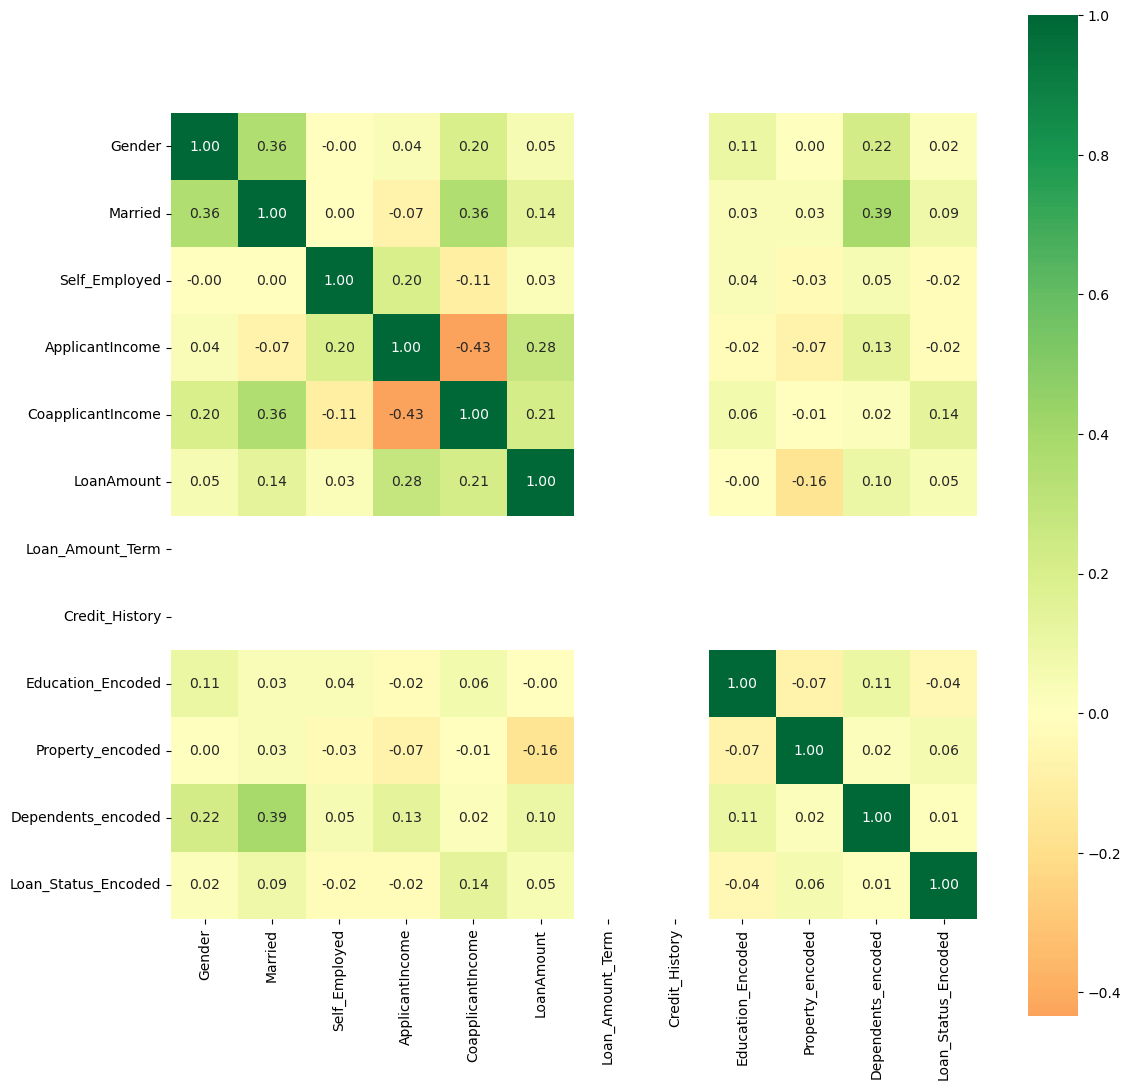

In [385]:
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(bank.corr(), annot=True, cmap='RdYlGn', center=0, square=True, fmt =".2f")

In [386]:
bank.isnull().sum()

Gender                 0
Married                0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Education_Encoded      0
Property_encoded       0
Dependents_encoded     0
Loan_Status_Encoded    0
dtype: int64

In [387]:
bank['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    381
Name: count, dtype: int64

In [388]:
bank['Credit_History'].value_counts()

Credit_History
1.0    381
Name: count, dtype: int64

# using value counts i observed that all the rows for the column Loan_Amount_Term and Credit_History have the same values meaning they are constant columns so we have to drop them

In [389]:
bank = bank.drop(columns = ['Loan_Amount_Term' , 'Credit_History'])

<Axes: >

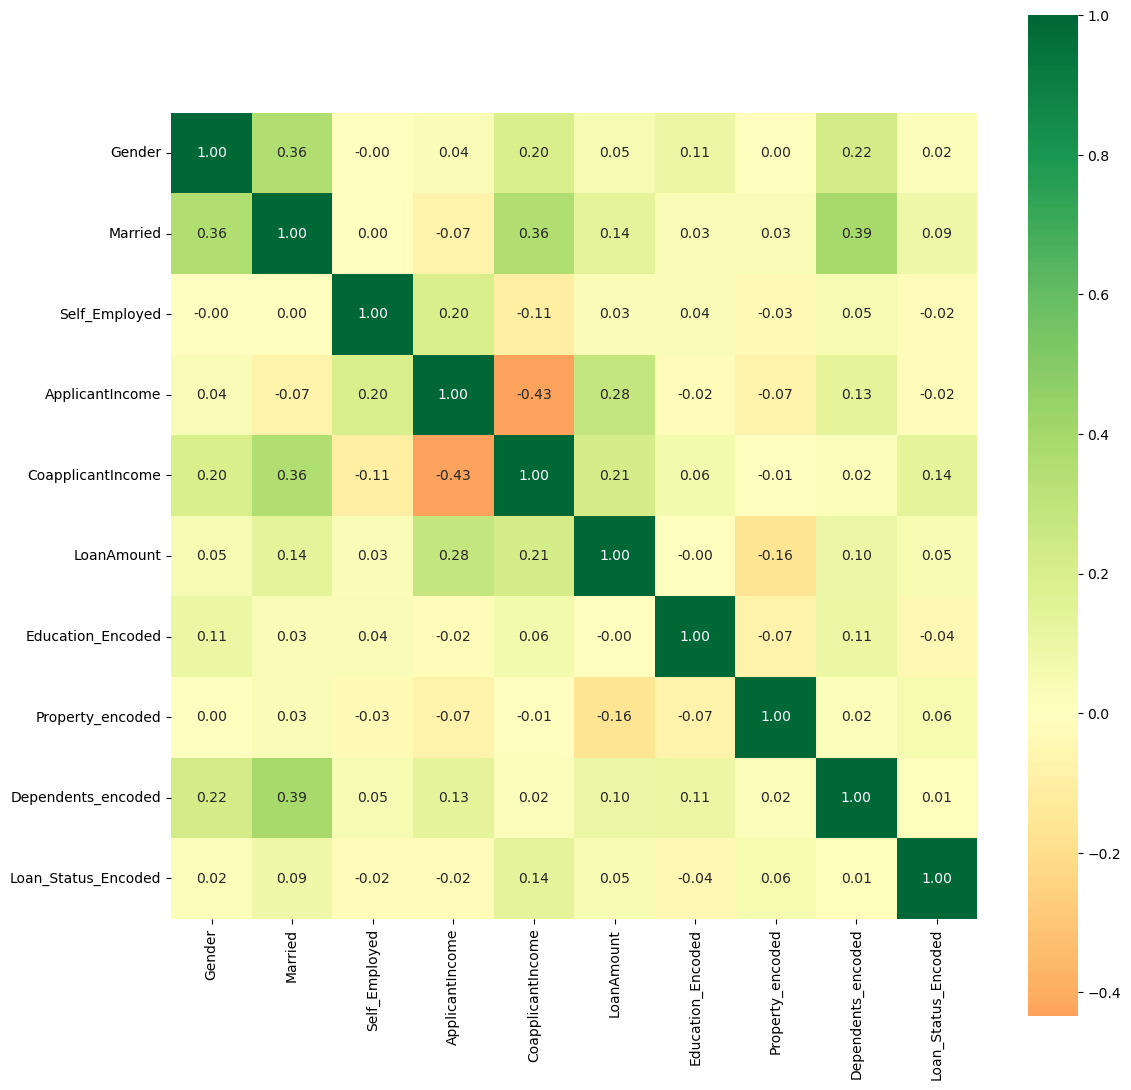

In [390]:
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(bank.corr(), annot=True, cmap='RdYlGn', center=0, square=True, fmt =".2f")

 # Saving cleaned file

In [391]:
bank.to_csv("Cleaned Bank Data.csv", index = False)

# Performing linear regression on the data set

In [392]:
from sklearn.linear_model import LinearRegression

In [393]:
# y = bank['Loan_Status_Encoded']
# X = bank[['ApplicantIncome']]

In [394]:
# lm2 = LinearRegression()
# lm2.fit(X,y)

In [395]:
# print(lm2.intercept_, lm2.coef_)

# I observeed that loan status is not continuous therefore logistics regression will be more ideal to use

In [396]:
# Performing logistics regression and splitting data into test and train

In [397]:
y = bank['Loan_Status_Encoded']
X = bank.drop("Loan_Status_Encoded", axis=1)

In [398]:
    X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              381 non-null    int32  
 1   Married             381 non-null    int32  
 2   Self_Employed       381 non-null    int32  
 3   ApplicantIncome     381 non-null    float64
 4   CoapplicantIncome   381 non-null    float64
 5   LoanAmount          381 non-null    float64
 6   Education_Encoded   381 non-null    float64
 7   Property_encoded    381 non-null    float64
 8   Dependents_encoded  381 non-null    float64
dtypes: float64(6), int32(3)
memory usage: 22.5 KB


In [399]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [400]:
X_train.shape

(304, 9)

In [401]:
X_test.shape

(77, 9)

In [402]:
from sklearn.linear_model import LogisticRegression
# Creating an instance of the Logistic Regression model
model = LogisticRegression()

# Training the model on the training data
model.fit(X_train, y_train)

C:\Users\musa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [403]:
# Making predictions on the test data
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Performing Evaluation metrics

In [404]:
from sklearn.metrics import accuracy_score
# Evaluating the model's accuracy for train
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 0.7072368421052632


In [405]:
# Evaluating model accuracy for test
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7272727272727273


In [406]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

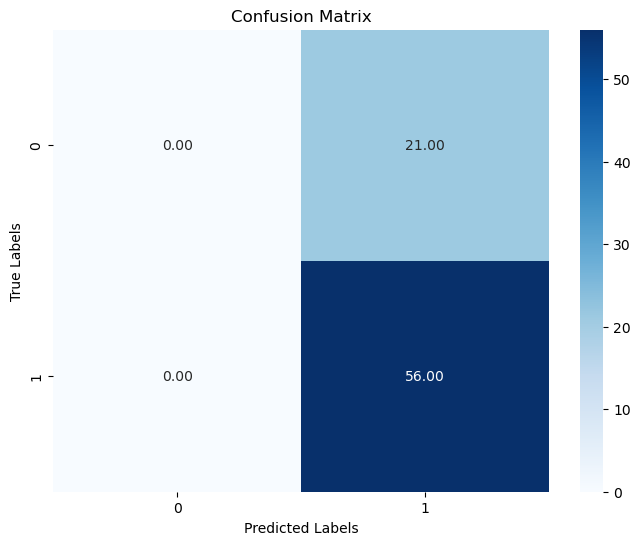

In [407]:


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()

In [408]:
print(cm)

[[ 0 21]
 [ 0 56]]


In [409]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [410]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save train and test data separately
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# Performing subset selection

In [411]:
X_train.columns.shape

(9,)

In [412]:
coefficients.shape

(9,)

In [413]:
print(coefficients)

[-2.94019377e-02  2.48183856e-02 -2.88831704e-01  1.23646188e-04
  8.60851903e-02  2.29272505e-04 -1.57859934e-01  2.39526154e-02
  5.18843401e-02]


In [414]:
# Get the feature names
feature_names = X_train.columns  # Replace <your_feature_names> with the actual feature names from your dataset

# Get the coefficients
coefficients = model.coef_
coefficients = coefficients.reshape(-1)

# Print feature names and coefficients
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}:\t\t\t {coef:.6e}")
    

Gender:			 -2.940194e-02
Married:			 2.481839e-02
Self_Employed:			 -2.888317e-01
ApplicantIncome:			 1.236462e-04
CoapplicantIncome:			 8.608519e-02
LoanAmount:			 2.292725e-04
Education_Encoded:			 -1.578599e-01
Property_encoded:			 2.395262e-02
Dependents_encoded:			 5.188434e-02


In [415]:
print(feature_names)

Index(['Gender', 'Married', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Education_Encoded',
       'Property_encoded', 'Dependents_encoded'],
      dtype='object')


In [416]:

selected_features = [feature for feature, coef in zip(feature_names, coefficients) 
                     if np.any(np.abs(coef )>= 0.5) or np.any(coef < -0.5)]

In [417]:
selected_features

[]

# i observed that since none of the coefficients meet the threshold none of them individually have a strong influence ont he model so i'll try another method

In [418]:
# Lasso regularization

In [419]:
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

In [420]:
lasso_log_reg.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [421]:
y_test_pred = lasso_log_reg.predict(X_test)

In [422]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7272727272727273


In [423]:
feature_names = X_train.columns  # Assuming X_train is a DataFrame
coefficients = lasso_log_reg.coef_[0]  # For binary classification
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

Gender: 0.0
Married: 0.0
Self_Employed: -0.04166806835320872
ApplicantIncome: 0.0017402307582747802
CoapplicantIncome: 0.09139745822859828
LoanAmount: 0.0007845831222820438
Education_Encoded: -0.08495423883748335
Property_encoded: 0.039414949196729145
Dependents_encoded: 0.017823701838073858


In [ ]:
# Using precision and recall

In [424]:
from sklearn.metrics import precision_score, recall_score, classification_report


In [427]:
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7072368421052632
Recall: 1.0


In [428]:
print(classification_report(y_train, y_pred))

C:\Users\musa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        89
         1.0       0.71      1.00      0.83       215

    accuracy                           0.71       304
   macro avg       0.35      0.50      0.41       304
weighted avg       0.50      0.71      0.59       304



C:\Users\musa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\musa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
